In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import json

In [2]:
data_file = open("data/yelp_academic_dataset_business.json")
data = []
for line in data_file:
    data.append(json.loads(line))
business = pd.DataFrame(data)
data_file.close()

In [3]:
# business.drop(['hours','attributes'], axis=1, inplace=True)
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
business.head()
usa=usa.dropna(axis=0, subset=['categories'])

us_restaurants=usa[usa['categories'].str.contains('Restaurants')]
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'

## drop null values in category, 
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])

## delete original column categories 
del us_restaurants['categories']

## and reset the index
us_restaurants=us_restaurants.reset_index(drop=True)

/var/folders/2s/l91lc7n15_v8ttwq_5b399f40000gn/T/ipykernel_98208/1650552434.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  us_restaurants['category']=pd.Series()
/var/folders/2s/l91lc7n15_v8ttwq_5b399f40000gn/T/ipykernel_98208/1650552434.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_restaurants['category']=pd.Series()


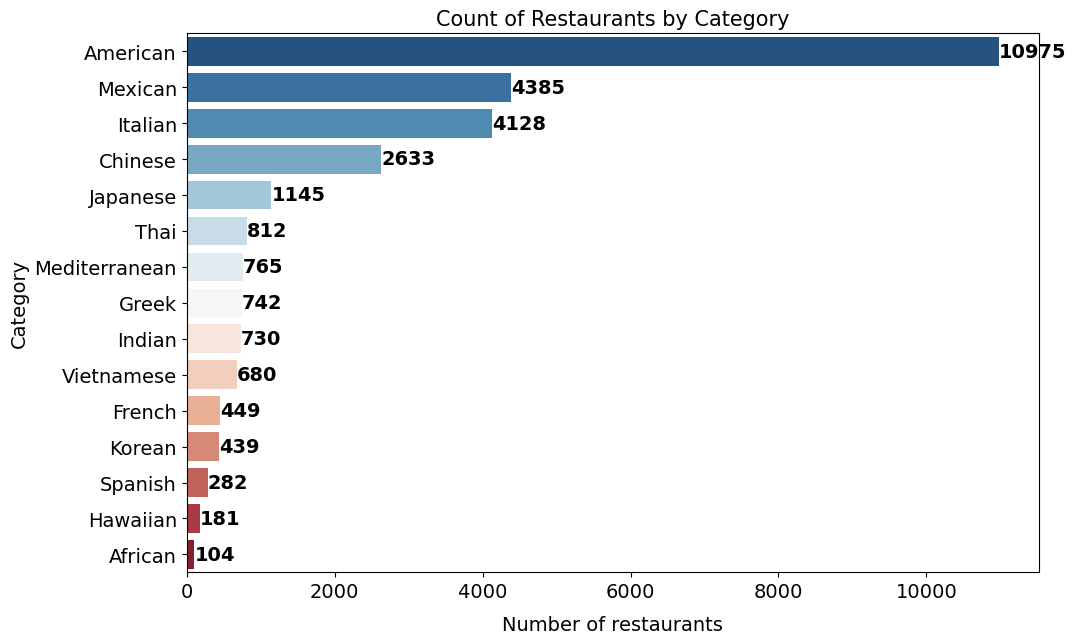

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
ax.xlabel('Number of restaurants', fontsize=14, labelpad=10)
ax.ylabel('Category', fontsize=14)
ax.title('Count of Restaurants by Category', fontsize=15)
ax.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

In [4]:
df_cat = us_restaurants[['state','category']]
df_cat_dum = pd.get_dummies(data = df_cat, columns = df_cat.columns)
df = pd.concat((us_restaurants, df_cat_dum ), axis = 1)
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_Hawaiian,category_Indian,category_Italian,category_Japanese,category_Korean,category_Mediterranean,category_Mexican,category_Spanish,category_Thai,category_Vietnamese
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,0,0,0,0,0,0,0,0,0,0
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,1
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,0,0,0,0,0,0,0,0
3,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,0,0,1,0,0,0,0,0,0,0
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28445,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,...,0,0,1,0,0,0,0,0,0,0
28446,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,...,0,0,1,0,0,0,0,0,0,0
28447,sf_oQ62L8UEnOOLf00nNGA,Pizza Hut,5028 Old Hickory,Hermitage,TN,37076,36.193201,-86.614748,3.0,6,...,0,0,1,0,0,0,0,0,0,0
28448,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,...,0,0,0,0,0,0,0,0,0,0


In [10]:
category = ['category_American', 'category_Chinese', 'category_French',
           'category_Greek', 'category_Hawaiian', 'category_Indian',
       'category_Italian', 'category_Japanese', 'category_Korean',
       'category_Mediterranean', 'category_Mexican', 'category_Spanish',
       'category_Thai', 'category_Vietnamese']

In [6]:
data = []
names = []
for x in category:
    grouped = df.groupby('state')[x].sum()
    name = x.split('_')[1]
    names.append(name)
    data.append(grouped.values)
distribution = pd.DataFrame(data, columns=grouped.index,index=names)
distribution
#distribution.to_csv('./data/distribution_by_category.csv')

state,AZ,CA,DE,FL,ID,IL,IN,LA,MO,MT,NC,NJ,NV,PA,TN
American,507,240,211,2093,291,276,977,779,1073,1,1,552,328,2537,1109
Chinese,136,44,65,380,58,57,195,129,264,0,0,245,86,815,159
French,13,27,2,40,12,0,17,87,36,0,0,17,8,152,38
Greek,29,7,14,244,16,9,53,34,59,0,0,24,17,132,104
Hawaiian,14,7,4,40,21,1,10,11,4,0,0,4,18,30,17
Indian,20,13,28,107,9,4,69,26,51,0,0,52,19,286,46
Italian,166,75,85,700,65,81,229,215,330,0,0,515,94,1333,240
Japanese,57,40,18,202,40,11,86,79,74,0,0,80,48,304,106
Korean,19,13,4,47,17,10,24,16,47,0,0,19,20,173,30
Mediterranean,29,16,12,128,20,6,50,59,71,0,0,46,12,257,59


In [7]:
grouped = df.groupby('city')['category_Greek'].sum().sort_values(ascending=False)

In [18]:
data_city = []
names = []
for x in category:
    grouped = df.groupby('city')[x].sum()
    data_city.append(grouped.values)
    name = x.split('_')[1]
    names.append(name)
distribution_city = pd.DataFrame(data_city, columns=grouped.index,index=names)
distribution_city.to_csv('./data/distribution_city.csv')
distribution_city

In [15]:
grouped.index

Index(['Abington', 'Abington Township', 'Affton', 'Aldan', 'Alloway', 'Alton',
       'Ambler', 'Antioch', 'Apollo Beach', 'Arabi',
       ...
       'Yeadon', 'Zephyrhills', 'Zieglerville', 'Zionsville', 'erdenheim',
       'goodlettsville', 'sewell', 'tucson', 'wilmington', 'wimauma'],
      dtype='object', name='city', length=741)

## Test

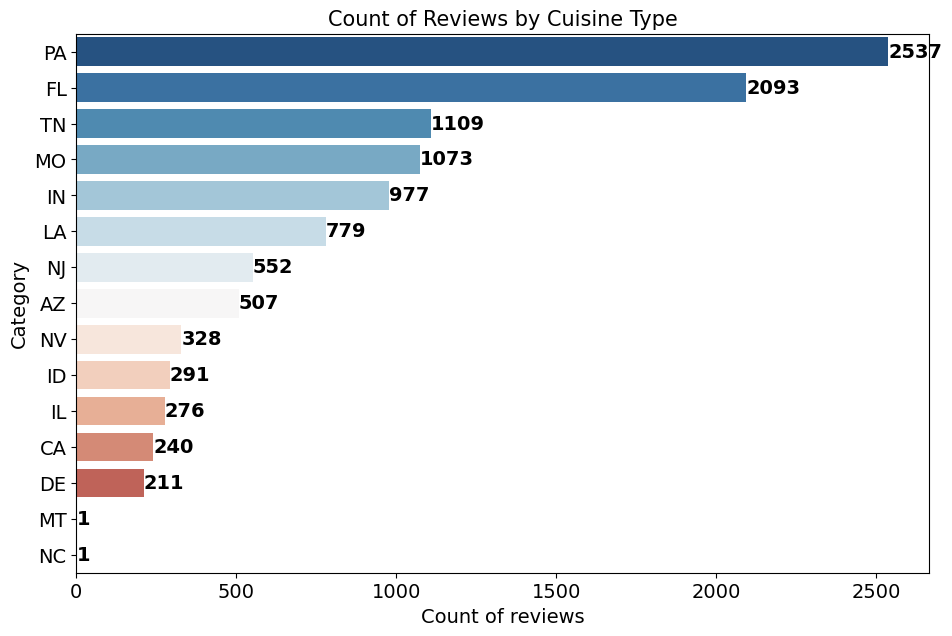

In [81]:
import streamlit as st
import pandas as pd
import seaborn as sns
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

def plot_distribution(data):
    fig, ax = plt.subplots(figsize=(11, 7))
    sns.barplot(y=data.index, x= data.values, palette= sns.color_palette("RdBu_r", len(data)),ax=ax)
    ax.set_ylabel('Category', fontsize=14)
    ax.set_xlabel('Count of reviews', fontsize=14)
    ax.set_title('Count of Reviews by Cuisine Type', fontsize=15)
    for i,v in enumerate(data):
        ax.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
    ax.tick_params(labelsize=14)

    return fig


distribution = pd.read_csv('./data/distribution_by_category.csv', index_col=[0])
category = distribution.index
x = 'American'
fig = plot_distribution(distribution.loc[x].sort_values(ascending=False))
# plt.plot(fig)

In [78]:
distribution

,AZ,CA,DE,FL,ID,IL,IN,LA,MO,MT,NC,NJ,NV,PA,TN
American,507,240,211,2093,291,276,977,779,1073,1,1,552,328,2537,1109
Chinese,136,44,65,380,58,57,195,129,264,0,0,245,86,815,159
French,13,27,2,40,12,0,17,87,36,0,0,17,8,152,38
Greek,29,7,14,244,16,9,53,34,59,0,0,24,17,132,104
Hawaiian,14,7,4,40,21,1,10,11,4,0,0,4,18,30,17
Indian,20,13,28,107,9,4,69,26,51,0,0,52,19,286,46
Italian,166,75,85,700,65,81,229,215,330,0,0,515,94,1333,240
Japanese,57,40,18,202,40,11,86,79,74,0,0,80,48,304,106
Korean,19,13,4,47,17,10,24,16,47,0,0,19,20,173,30
Mediterranean,29,16,12,128,20,6,50,59,71,0,0,46,12,257,59
